# LOAN ELIGIBILITY PREDICTION 
The aim of this work is towards helping the banks accurately determine, through an automation process, whether a customer can obtain a loan or not depending on the details provided by the customer while making the application. 

In [1]:
#import the required modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import *
style.use("ggplot")
%matplotlib inline
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix, f1_score, matthews_corrcoef

#The PolynomialFeatures will be used for feature creation to explore the nonlinear pattern of the numerical data.
from sklearn.preprocessing import PolynomialFeatures
#The Pipeline is used to package the feature creator and the classifier.
from sklearn.pipeline import Pipeline


# For feature creation
# Degree 2 is used here but one can set the degree to be a hyperparameter to further explore the accuracy of the model
poly = PolynomialFeatures(degree = 2)

#importing the classifiers
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron

#for combining multiple models into one 
from sklearn.ensemble import StackingClassifier

In [2]:
#read the dataset 
#the data was saved on my computer, so you can edit the file path to suit you
#this could be a url

loan_train = pd.read_csv("/Users/apple/Documents/OPEN_UNIVERSITY/Data_for_DataScience/Loan-Eligibility-Prediction-Project/train.csv")
loan_test = pd.read_csv("/Users/apple/Documents/OPEN_UNIVERSITY/Data_for_DataScience/Loan-Eligibility-Prediction-Project/test.csv")


In [3]:
#set what the datasets look like
print(loan_train.shape)
loan_train.head()

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
print(loan_test.shape)
loan_test.head()

(367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
# info about the datasets
print(loan_train.info())
print(loan_train.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education  

In [6]:
print(loan_test.info())
print(loan_test.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB
None
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIn

#One would notice that the test.csv data does not contain the loan status column. The implication of this is that one would not be able to evaluate the accuracy of the models from the data. Hence, only the train.csv data would be used for this project.

# Data Analysis 

Text(0.5, 1.0, 'Self-employed count')

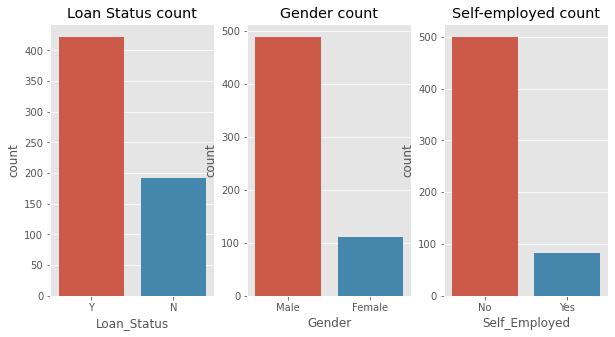

In [7]:
#Some analysis of the data is done to check the dependence of the feature variables to the label variable
plt.rcParams['figure.figsize'] = (10.0, 5.0)
fig, ax = plt.subplots(nrows = 1, ncols = 3)
sns.countplot(ax = ax[0], x = loan_train["Loan_Status"])
ax[0].set_title("Loan Status count")
sns.countplot(ax = ax[1], x = loan_train["Gender"])
ax[1].set_title("Gender count")
sns.countplot(ax = ax[2], x = loan_train["Self_Employed"])
ax[2].set_title("Self-employed count")

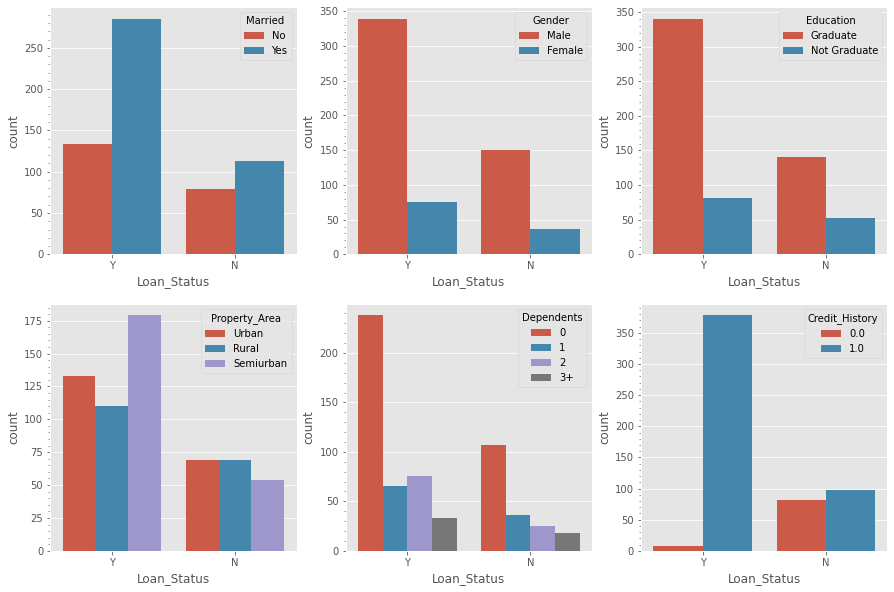

In [8]:
#checking dependencies
plt.rcParams['figure.figsize'] = (15.0, 10.0)
fig, ax = plt.subplots(nrows = 2, ncols = 3)
sns.countplot(ax = ax[0,0], x = "Loan_Status", hue = "Married", data = loan_train)
#for minor ticks
ax[0,0].yaxis.set_minor_locator(MultipleLocator(10))
sns.countplot(ax = ax[0,1], x = "Loan_Status", hue = "Gender", data = loan_train)
ax[0,1].yaxis.set_minor_locator(MultipleLocator(10))
sns.countplot(ax = ax[0,2], x = "Loan_Status", hue = "Education", data = loan_train)
ax[0,2].yaxis.set_minor_locator(MultipleLocator(10))
sns.countplot(ax = ax[1,0], x = "Loan_Status", hue = "Property_Area", data = loan_train)
ax[1,0].yaxis.set_minor_locator(MultipleLocator(5))
sns.countplot(ax = ax[1,1], x = "Loan_Status", hue = "Dependents", data = loan_train)
ax[1,1].yaxis.set_minor_locator(MultipleLocator(10))
sns.countplot(ax = ax[1,2], x = "Loan_Status", hue = "Credit_History", data = loan_train)
ax[1,2].yaxis.set_minor_locator(MultipleLocator(10))
plt.show()



From the charts above, 

  - about 59% of the unmarried people are not eligible to get a loan while only about 42% of the married people are eligible. Hence, one is more likely to get a loan if the person is married.
  
  - about 43% of the female gender was rejected loan while about 44% of the male gender was rejected loan. Hence, one can say that the loan eligibility does not necessarily depend on the person's gender.   
  
  - about 63% of the non-graduates are not eligible to get a loan while only about 41% of the graduates are eligible. Hence, a non-graduate is less likely to be eligible for a loan.
  
  - one is more likely to get a loan if the property is in a semiurban area giving that about 39%, 34% and 23% of the people whose properties are in the rural, urban and semiurban areas respectively are not eligible for a loan,
  
  - the number of people with or without dependent that are not eligible for a loan are as follows:  0: 45%, 1:35%, 2:26%, and 3+: 40%. Hence, one can say that a person is more likely to be eligible for a loan if he/she has 1 or 2 dependents. 
 
  - one is less likely to be eligible for a loan if they do not completely the requirements for the loan eligibility

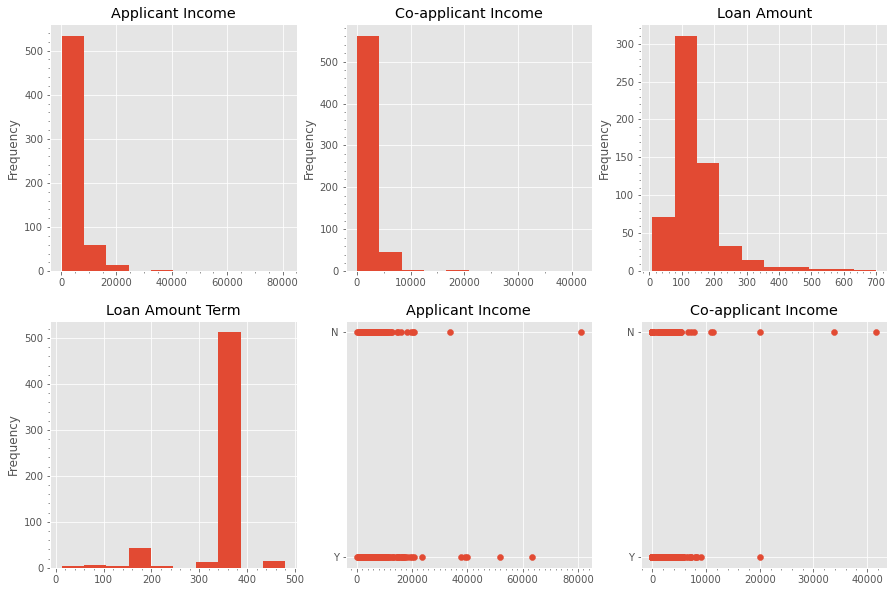

   
Mean Applicant Income  =  5403.459283387622
Mean Co-applicant Income  =  1621.245798027101
Mean Loan Amount  =  146.41216216216216
Mean Loan Amount Term  =  342.0


In [9]:
#The distribution of the applicant's income
plt.rcParams['figure.figsize'] = (15.0, 10.0)
figs, ax = plt.subplots(nrows = 2, ncols = 3)
loan_train['ApplicantIncome'].plot.hist(ax = ax[0,0], title = 'Applicant Income')
ax[0,0].yaxis.set_minor_locator(MultipleLocator(20))
ax[0,0].xaxis.set_minor_locator(MultipleLocator(5000))

loan_train['CoapplicantIncome'].plot.hist(ax = ax[0,1], title = 'Co-applicant Income')
ax[0,1].yaxis.set_minor_locator(MultipleLocator(20))
ax[0,1].xaxis.set_minor_locator(MultipleLocator(5000))


loan_train['LoanAmount'].plot.hist(ax = ax[0,2], title = 'Loan Amount')
ax[0,2].yaxis.set_minor_locator(MultipleLocator(10))
ax[0,2].xaxis.set_minor_locator(MultipleLocator(20))

loan_train['Loan_Amount_Term'].plot.hist(ax = ax[1,0], title = 'Loan Amount Term')
ax[1,0].yaxis.set_minor_locator(MultipleLocator(20))
ax[1,0].xaxis.set_minor_locator(MultipleLocator(20))

ax[1,1].scatter(loan_train['ApplicantIncome'], loan_train['Loan_Status'])
ax[1,1].set_title('Applicant Income')
ax[1,1].xaxis.set_minor_locator(MultipleLocator(2000))

ax[1,2].scatter( x = loan_train['CoapplicantIncome'], y = loan_train['Loan_Status'])
ax[1,2].set_title('Co-applicant Income')
ax[1,2].xaxis.set_minor_locator(MultipleLocator(2000))

plt.show()
print("   ")
print('Mean Applicant Income  = ', np.mean(loan_train['ApplicantIncome']))
print('Mean Co-applicant Income  = ', np.mean(loan_train['CoapplicantIncome']))
print('Mean Loan Amount  = ', np.mean(loan_train['LoanAmount']))
print('Mean Loan Amount Term  = ', np.mean(loan_train['Loan_Amount_Term']))


# Data Wrangling

<AxesSubplot:>

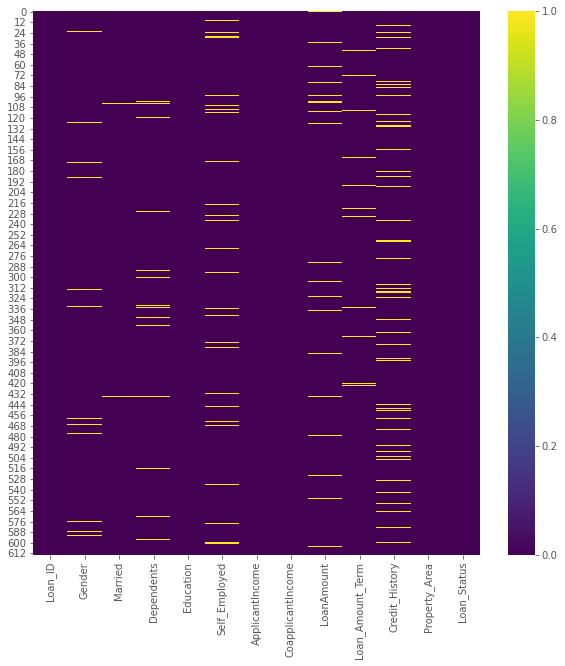

In [10]:
#get rid of all the null values in the data

   #first the heat map for the null values
plt.rcParams['figure.figsize'] = (10.0, 10.0)
sns.heatmap(loan_train.isnull(), cmap="viridis")

<AxesSubplot:>

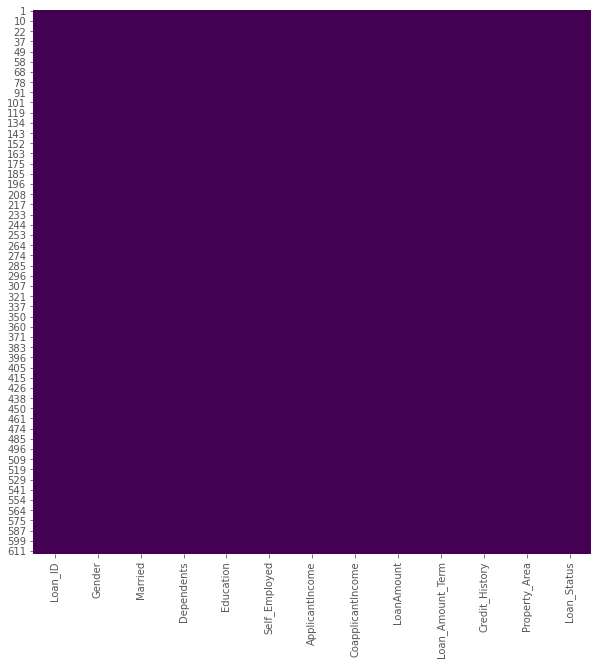

In [11]:
#now remove all the null values
loan_train.dropna(inplace = True)

#check the heatmap again
sns.heatmap(loan_train.isnull(), cmap="viridis", cbar = False)

In [12]:
#or you can print out the isnull count
print(loan_train.isnull().sum())
print(loan_train.shape)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
(480, 13)


# Data Preprocessing

In [13]:
#the Loan_ID column is not needed, so it is dropped
loan_train.drop("Loan_ID", axis = 1, inplace = True)

In [14]:
#encode the string values in the necessary column
encoder  = LabelEncoder()

#THE GENDER COLUMN: Female = 0, Male  = 1
loan_train["Gender"] = encoder.fit_transform(loan_train["Gender"])
loan_train = loan_train.rename(columns = {"Gender":"Male_Gender"})
loan_train["Male_Gender"].value_counts()

1    394
0     86
Name: Male_Gender, dtype: int64

In [15]:
#THE MARRIED COLUMN: Yes = 1, No = 0
loan_train["Married"] = encoder.fit_transform(loan_train["Married"])
loan_train["Married"].value_counts()

1    311
0    169
Name: Married, dtype: int64

In [16]:
#THE EDUCATION COLUMN: Graduate = 0, Not Graduate  = 1
loan_train["Education"] = encoder.fit_transform(loan_train["Education"])
loan_train = loan_train.rename(columns = {"Education":"Not_Graduate"})
loan_train["Not_Graduate"].value_counts()

0    383
1     97
Name: Not_Graduate, dtype: int64

In [17]:
#THE SELF-ENPMPLOYED COLUMN: No = 1, Yes = 0
loan_train["Self_Employed"] = encoder.fit_transform(loan_train["Self_Employed"])
loan_train["Self_Employed"].value_counts()

0    414
1     66
Name: Self_Employed, dtype: int64

In [18]:
#THE SELF-ENPMPLOYED COLUMN: No = 0, Yes = 1
loan_train["Loan_Status"] = encoder.fit_transform(loan_train["Loan_Status"])
loan_train["Loan_Status"].value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

In [19]:
#THE PROPERTY AREA COLUMN
#This column has a multivalued. So, one can either use get_dummies or one-hot-encoder

property_area = pd.get_dummies(loan_train["Property_Area"], drop_first = True)
print(property_area.head())


   Semiurban  Urban
1          0      0
2          0      1
3          0      1
4          0      1
5          0      1


In [20]:
#THE DEPENDENT COLUMN: This is also multivalued
dependents_ = pd.get_dummies(loan_train["Dependents"])
print(dependents_.head())

   0  1  2  3+
1  0  1  0   0
2  1  0  0   0
3  1  0  0   0
4  1  0  0   0
5  0  0  1   0


In [21]:
#one can then concatenate this with the main data
loan_train = pd.concat([loan_train, property_area, dependents_], axis = 1)

#drop the previous property area, dependents and the 3+ columns
loan_train.drop(["Property_Area", "Dependents", "3+" ], axis = 1, inplace = True)
loan_train = loan_train.rename(columns = {"0":"0_dependent", "1":"1_dependent", "2":"2_dependents"})
loan_train.head()

,Male_Gender,Married,Not_Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Semiurban,Urban,0_dependent,1_dependent,2_dependents
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,0,0,1,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,1,0,1,1,0,0
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,1,0,1,1,0,0
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,0
5,1,1,0,1,5417,4196.0,267.0,360.0,1.0,1,0,1,0,0,1


# Data Splitting

In [22]:
#split the data into features and labels
x = loan_train.drop(["Loan_Status"], axis = 1)
y = loan_train["Loan_Status"]

#split the data into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 20)

In [23]:
#scale the data due to large range of of the distribution
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Building the models

In [24]:
#Keep all the classifiers in a list so that the testing and training can be done once and for all
#then one can choose the one with the best accuracy
classifiers_ = [
    ("AdaBoost", AdaBoostClassifier()),
    ("Decision Tree", DecisionTreeClassifier(max_depth=3)),
    ("Gaussian Process", GaussianProcessClassifier(1.0 * RBF(1.0))),
    ("Linear SVM", SVC(kernel="linear", C=1,probability=True)),
    ("Naive Bayes",GaussianNB()),
    ("Nearest Neighbors",KNeighborsClassifier(2)),
    ("Neural Net",MLPClassifier(alpha=1)),
    ("QDA", QuadraticDiscriminantAnalysis()),
    ("Random Forest",RandomForestClassifier(n_jobs=2, random_state=1)),
    ("RBF SVM",SVC(gamma=2, C=1,probability=True)),
    ("SGDClassifier", SGDClassifier(max_iter=1000, tol=10e-3,penalty='elasticnet')),
    ("LogisticRegression", LogisticRegression()), 
    ("Perceptron", Perceptron(tol=1e-3, random_state=0)), 
    ("BaggingClassifier", BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=0))
    ] 

In [25]:
for n,clf in classifiers_:
    print("n = ",n, " and clf = ", clf)

n =  AdaBoost  and clf =  AdaBoostClassifier()
n =  Decision Tree  and clf =  DecisionTreeClassifier(max_depth=3)
n =  Gaussian Process  and clf =  GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1))
n =  Linear SVM  and clf =  SVC(C=1, kernel='linear', probability=True)
n =  Naive Bayes  and clf =  GaussianNB()
n =  Nearest Neighbors  and clf =  KNeighborsClassifier(n_neighbors=2)
n =  Neural Net  and clf =  MLPClassifier(alpha=1)
n =  QDA  and clf =  QuadraticDiscriminantAnalysis()
n =  Random Forest  and clf =  RandomForestClassifier(n_jobs=2, random_state=1)
n =  RBF SVM  and clf =  SVC(C=1, gamma=2, probability=True)
n =  SGDClassifier  and clf =  SGDClassifier(penalty='elasticnet', tol=0.01)
n =  LogisticRegression  and clf =  LogisticRegression()
n =  Perceptron  and clf =  Perceptron()
n =  BaggingClassifier  and clf =  BaggingClassifier(base_estimator=SVC(), random_state=0)


0 : AdaBoost training done! 
 
              precision    recall  f1-score   support

           0       0.63      0.63      0.63        38
           1       0.83      0.83      0.83        82

    accuracy                           0.77       120
   macro avg       0.73      0.73      0.73       120
weighted avg       0.77      0.77      0.77       120

[[24 14]
 [14 68]]


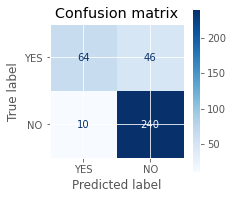

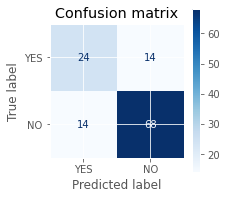

The Training Accuracy Score:  0.8444444444444444
The Training F1 Score:  0.8955223880597014
The Training Matthews coefficient:  0.6176195648685947
AdaBoost training score done!
The Accuracy Score:  0.7666666666666667
Test F1 Score:  0.8292682926829268
The Testing Matthews coefficient:  0.46084724005134786
AdaBoost testing score done!
-------------------------------------------------------
  
1 : Decision Tree training done! 
 
              precision    recall  f1-score   support

           0       0.86      0.63      0.73        38
           1       0.85      0.95      0.90        82

    accuracy                           0.85       120
   macro avg       0.85      0.79      0.81       120
weighted avg       0.85      0.85      0.84       120

[[24 14]
 [ 4 78]]


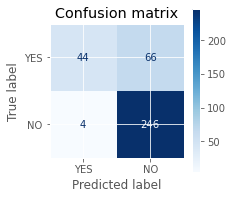

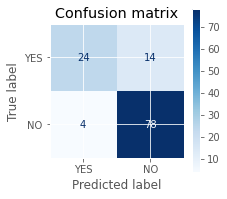

The Training Accuracy Score:  0.8055555555555556
The Training F1 Score:  0.8754448398576513
The Training Matthews coefficient:  0.5203549084703928
Decision Tree training score done!
The Accuracy Score:  0.85
Test F1 Score:  0.8965517241379309
The Testing Matthews coefficient:  0.6409795742933276
Decision Tree testing score done!
-------------------------------------------------------
  
2 : Gaussian Process training done! 
 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.68      1.00      0.81        82

    accuracy                           0.68       120
   macro avg       0.34      0.50      0.41       120
weighted avg       0.47      0.68      0.55       120

[[ 0 38]
 [ 0 82]]


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


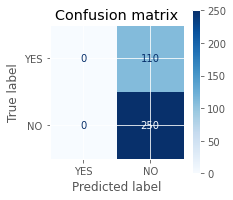

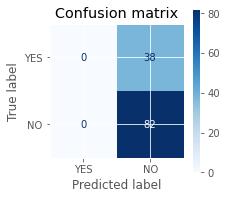

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


The Training Accuracy Score:  0.6944444444444444
The Training F1 Score:  0.819672131147541
The Training Matthews coefficient:  0.0
Gaussian Process training score done!
The Accuracy Score:  0.6833333333333333
Test F1 Score:  0.8118811881188119
The Testing Matthews coefficient:  0.0
Gaussian Process testing score done!
-------------------------------------------------------
  
3 : Linear SVM training done! 
 
              precision    recall  f1-score   support

           0       0.89      0.63      0.74        38
           1       0.85      0.96      0.90        82

    accuracy                           0.86       120
   macro avg       0.87      0.80      0.82       120
weighted avg       0.86      0.86      0.85       120

[[24 14]
 [ 3 79]]


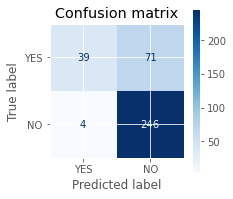

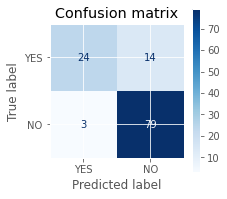

The Training Accuracy Score:  0.7916666666666666
The Training F1 Score:  0.8677248677248677
The Training Matthews coefficient:  0.48086091132291925
Linear SVM training score done!
The Accuracy Score:  0.8583333333333333
Test F1 Score:  0.9028571428571428
The Testing Matthews coefficient:  0.6628078585224708
Linear SVM testing score done!
-------------------------------------------------------
  
4 : Naive Bayes training done! 
 
              precision    recall  f1-score   support

           0       0.81      0.66      0.72        38
           1       0.85      0.93      0.89        82

    accuracy                           0.84       120
   macro avg       0.83      0.79      0.81       120
weighted avg       0.84      0.84      0.84       120

[[25 13]
 [ 6 76]]


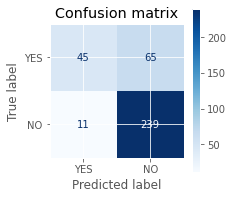

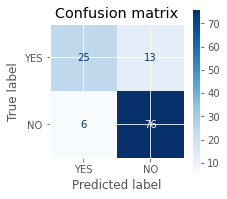

The Training Accuracy Score:  0.7888888888888889
The Training F1 Score:  0.8628158844765342
The Training Matthews coefficient:  0.4640198513207011
Naive Bayes training score done!
The Accuracy Score:  0.8416666666666667
Test F1 Score:  0.888888888888889
The Testing Matthews coefficient:  0.621403647155899
Naive Bayes testing score done!
-------------------------------------------------------
  
5 : Nearest Neighbors training done! 
 
              precision    recall  f1-score   support

           0       0.47      0.74      0.57        38
           1       0.83      0.61      0.70        82

    accuracy                           0.65       120
   macro avg       0.65      0.67      0.64       120
weighted avg       0.72      0.65      0.66       120

[[28 10]
 [32 50]]


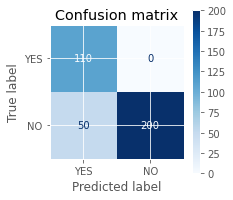

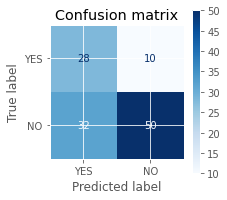

The Training Accuracy Score:  0.8611111111111112
The Training F1 Score:  0.888888888888889
The Training Matthews coefficient:  0.7416198487095663
Nearest Neighbors training score done!
The Accuracy Score:  0.65
Test F1 Score:  0.7042253521126761
The Testing Matthews coefficient:  0.32245846375500836
Nearest Neighbors testing score done!
-------------------------------------------------------
  
6 : Neural Net training done! 
 
              precision    recall  f1-score   support

           0       0.65      0.63      0.64        38
           1       0.83      0.84      0.84        82

    accuracy                           0.78       120
   macro avg       0.74      0.74      0.74       120
weighted avg       0.77      0.78      0.77       120

[[24 14]
 [13 69]]


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


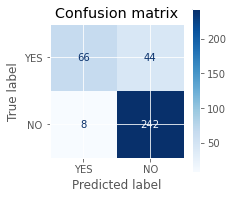

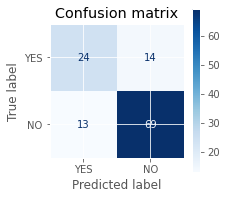

The Training Accuracy Score:  0.8555555555555555
The Training F1 Score:  0.9029850746268656
The Training Matthews coefficient:  0.6474642686743255
Neural Net training score done!
The Accuracy Score:  0.775
Test F1 Score:  0.8363636363636364
The Testing Matthews coefficient:  0.47649555185582404
Neural Net testing score done!
-------------------------------------------------------
  
7 : QDA training done! 
 
              precision    recall  f1-score   support

           0       0.68      0.61      0.64        38
           1       0.83      0.87      0.85        82

    accuracy                           0.78       120
   macro avg       0.75      0.74      0.74       120
weighted avg       0.78      0.78      0.78       120

[[23 15]
 [11 71]]


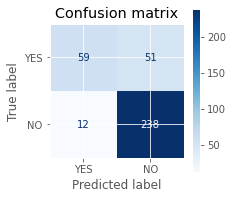

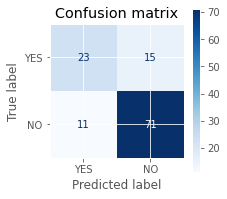

The Training Accuracy Score:  0.825
The Training F1 Score:  0.8831168831168831
The Training Matthews coefficient:  0.5653684509019654
QDA training score done!
The Accuracy Score:  0.7833333333333333
Test F1 Score:  0.8452380952380953
The Testing Matthews coefficient:  0.486338495483533
QDA testing score done!
-------------------------------------------------------
  
8 : Random Forest training done! 
 
              precision    recall  f1-score   support

           0       0.69      0.66      0.68        38
           1       0.85      0.87      0.86        82

    accuracy                           0.80       120
   macro avg       0.77      0.76      0.77       120
weighted avg       0.80      0.80      0.80       120

[[25 13]
 [11 71]]


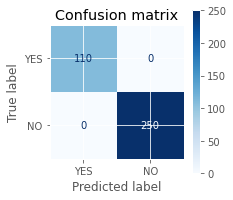

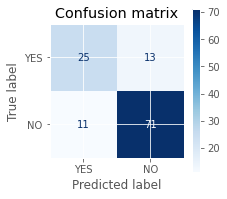

The Training Accuracy Score:  1.0
The Training F1 Score:  1.0
The Training Matthews coefficient:  1.0
Random Forest training score done!
The Accuracy Score:  0.8
Test F1 Score:  0.8554216867469879
The Testing Matthews coefficient:  0.5316557760173651
Random Forest testing score done!
-------------------------------------------------------
  
9 : RBF SVM training done! 
 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.68      0.96      0.79        82

    accuracy                           0.66       120
   macro avg       0.34      0.48      0.40       120
weighted avg       0.46      0.66      0.54       120

[[ 0 38]
 [ 3 79]]


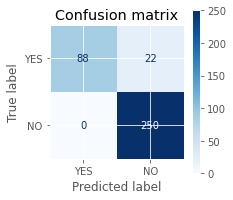

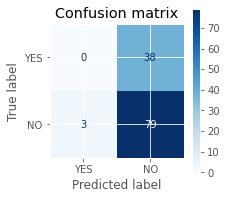

The Training Accuracy Score:  0.9388888888888889
The Training F1 Score:  0.9578544061302682
The Training Matthews coefficient:  0.8574929257125441
RBF SVM training score done!
The Accuracy Score:  0.6583333333333333
Test F1 Score:  0.7939698492462313
The Testing Matthews coefficient:  -0.10900654345759642
RBF SVM testing score done!
-------------------------------------------------------
  
10 : SGDClassifier training done! 
 
              precision    recall  f1-score   support

           0       0.65      0.58      0.61        38
           1       0.81      0.85      0.83        82

    accuracy                           0.77       120
   macro avg       0.73      0.72      0.72       120
weighted avg       0.76      0.77      0.76       120

[[22 16]
 [12 70]]


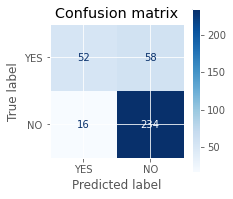

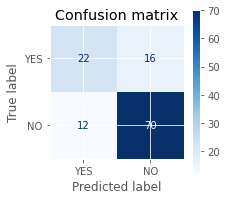

The Training Accuracy Score:  0.7944444444444444
The Training F1 Score:  0.8634686346863468
The Training Matthews coefficient:  0.4810099744919691
SGDClassifier training score done!
The Accuracy Score:  0.7666666666666667
Test F1 Score:  0.8333333333333333
The Testing Matthews coefficient:  0.44658330511703165
SGDClassifier testing score done!
-------------------------------------------------------
  
11 : LogisticRegression training done! 
 
              precision    recall  f1-score   support

           0       0.82      0.61      0.70        38
           1       0.84      0.94      0.89        82

    accuracy                           0.83       120
   macro avg       0.83      0.77      0.79       120
weighted avg       0.83      0.83      0.83       120

[[23 15]
 [ 5 77]]


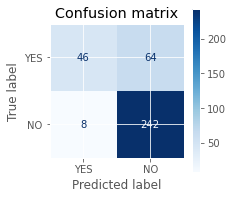

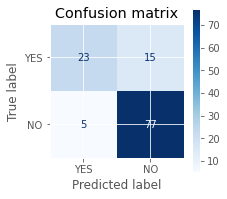

The Training Accuracy Score:  0.8
The Training F1 Score:  0.8705035971223022
The Training Matthews coefficient:  0.49819639048648384
LogisticRegression training score done!
The Accuracy Score:  0.8333333333333334
Test F1 Score:  0.885057471264368
The Testing Matthews coefficient:  0.5986240958157949
LogisticRegression testing score done!
-------------------------------------------------------
  
12 : Perceptron training done! 
 
              precision    recall  f1-score   support

           0       0.54      0.68      0.60        38
           1       0.83      0.73      0.78        82

    accuracy                           0.72       120
   macro avg       0.69      0.71      0.69       120
weighted avg       0.74      0.72      0.72       120

[[26 12]
 [22 60]]


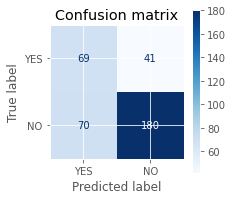

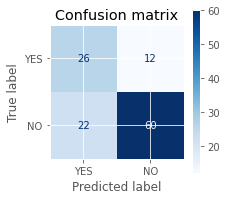

The Training Accuracy Score:  0.6916666666666667
The Training F1 Score:  0.7643312101910829
The Training Matthews coefficient:  0.3285742215861413
Perceptron training score done!
The Accuracy Score:  0.7166666666666667
Test F1 Score:  0.7792207792207793
The Testing Matthews coefficient:  0.3949293497207571
Perceptron testing score done!
-------------------------------------------------------
  
13 : BaggingClassifier training done! 
 
              precision    recall  f1-score   support

           0       0.74      0.61      0.67        38
           1       0.83      0.90      0.87        82

    accuracy                           0.81       120
   macro avg       0.79      0.75      0.77       120
weighted avg       0.80      0.81      0.80       120

[[23 15]
 [ 8 74]]


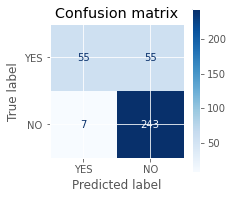

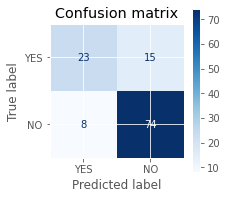

The Training Accuracy Score:  0.8277777777777777
The Training F1 Score:  0.8868613138686132
The Training Matthews coefficient:  0.57584336712306
BaggingClassifier training score done!
The Accuracy Score:  0.8083333333333333
Test F1 Score:  0.8654970760233918
The Testing Matthews coefficient:  0.5395502578488651
BaggingClassifier testing score done!
-------------------------------------------------------
  
Names:  ['AdaBoost', 'Decision Tree', 'Gaussian Process', 'Linear SVM', 'Naive Bayes', 'Nearest Neighbors', 'Neural Net', 'QDA', 'Random Forest', 'RBF SVM', 'SGDClassifier', 'LogisticRegression', 'Perceptron', 'BaggingClassifier']
Train Accuracy Scores:  [0.844, 0.806, 0.694, 0.792, 0.789, 0.861, 0.856, 0.825, 1.0, 0.939, 0.794, 0.8, 0.692, 0.828]
Test Accuracy Scores:  [0.767, 0.85, 0.683, 0.858, 0.842, 0.65, 0.775, 0.783, 0.8, 0.658, 0.767, 0.833, 0.717, 0.808]
Train F1 Scores:  [0.896, 0.875, 0.82, 0.868, 0.863, 0.889, 0.903, 0.883, 1.0, 0.958, 0.863, 0.871, 0.764, 0.887]
Test F1 

In [26]:
plt.rcParams['figure.figsize'] = (3.0, 3.0)
#use each Classifier to take its training results.
clf_names = []
train_accuracy_score = []
test_accuracy_score = []
predict_sums = []
test_f1score = []
train_f1score = []
test_matthews = []
train_matthews = []
i = 0

for n,clf in classifiers_:
    clf_names.append(n)
    
    # Model training
    clf.fit(X_train, y_train)
    print(i, ":",  n+" training done! \n ")
    
    # The prediction for both training and testing 
    clf.predict(X_test)
    clf.predict(X_train)
    predict_sums.append(clf.predict(X_test).sum()) 
        #you can print the classification report and confusion matrix if you like
    print(classification_report(y_test, clf.predict(X_test)))
    print(confusion_matrix(y_test, clf.predict(X_test)))
    
    #you can also plot the confussion matrix if you like
    disp1 = plot_confusion_matrix(clf, X_train, y_train,
                              display_labels=['YES','NO'],
                              cmap=plt.cm.Blues,
                              normalize=None)
    disp1.ax_.set_title('Confusion matrix')
    plt.show()
    
    disp = plot_confusion_matrix(clf, X_test, y_test,
                              display_labels=['YES','NO'],
                              cmap=plt.cm.Blues,
                              normalize=None)
    disp.ax_.set_title('Confusion matrix')
    plt.show()
    
    # Measure training accuracy and score
    train_accuracy_score.append(round(accuracy_score(y_train, clf.predict(X_train)), 3))
    train_matthews.append(round(matthews_corrcoef(y_train, clf.predict(X_train)),3))
    train_f1score.append(round(f1_score(y_train, clf.predict(X_train)),3))
    print("The Training Accuracy Score: ", accuracy_score(y_train, clf.predict(X_train)) )
    print("The Training F1 Score: ", f1_score(y_train, clf.predict(X_train)) )
    print("The Training Matthews coefficient: ", matthews_corrcoef(y_train, clf.predict(X_train)))
    print(n+" training score done!")
    
    # Measure test accuracy and score
    test_accuracy_score.append(round(accuracy_score(y_test, clf.predict(X_test)), 3))
    test_f1score.append(round(f1_score(y_test, clf.predict(X_test)),3))
    test_matthews.append(round(matthews_corrcoef(y_test, clf.predict(X_test)),3))
    print("The Accuracy Score: ", accuracy_score(y_test, clf.predict(X_test)))
    print("Test F1 Score: ",f1_score(y_test,clf.predict(X_test)))
    print("The Testing Matthews coefficient: ", matthews_corrcoef(y_test, clf.predict(X_test)))
    print(n+" testing score done!")
    print("-------------------------------------------------------")
    print("  ")
    i = i+1
print("Names: ", clf_names)
print("Train Accuracy Scores: ", train_accuracy_score)
print("Test Accuracy Scores: ", test_accuracy_score)
print("Train F1 Scores: ", train_f1score)
print("Test F1 Scores: ", test_f1score)
print("Train Matthews Coefficients", train_matthews)
print("Test Matthews Coefficients", test_matthews)

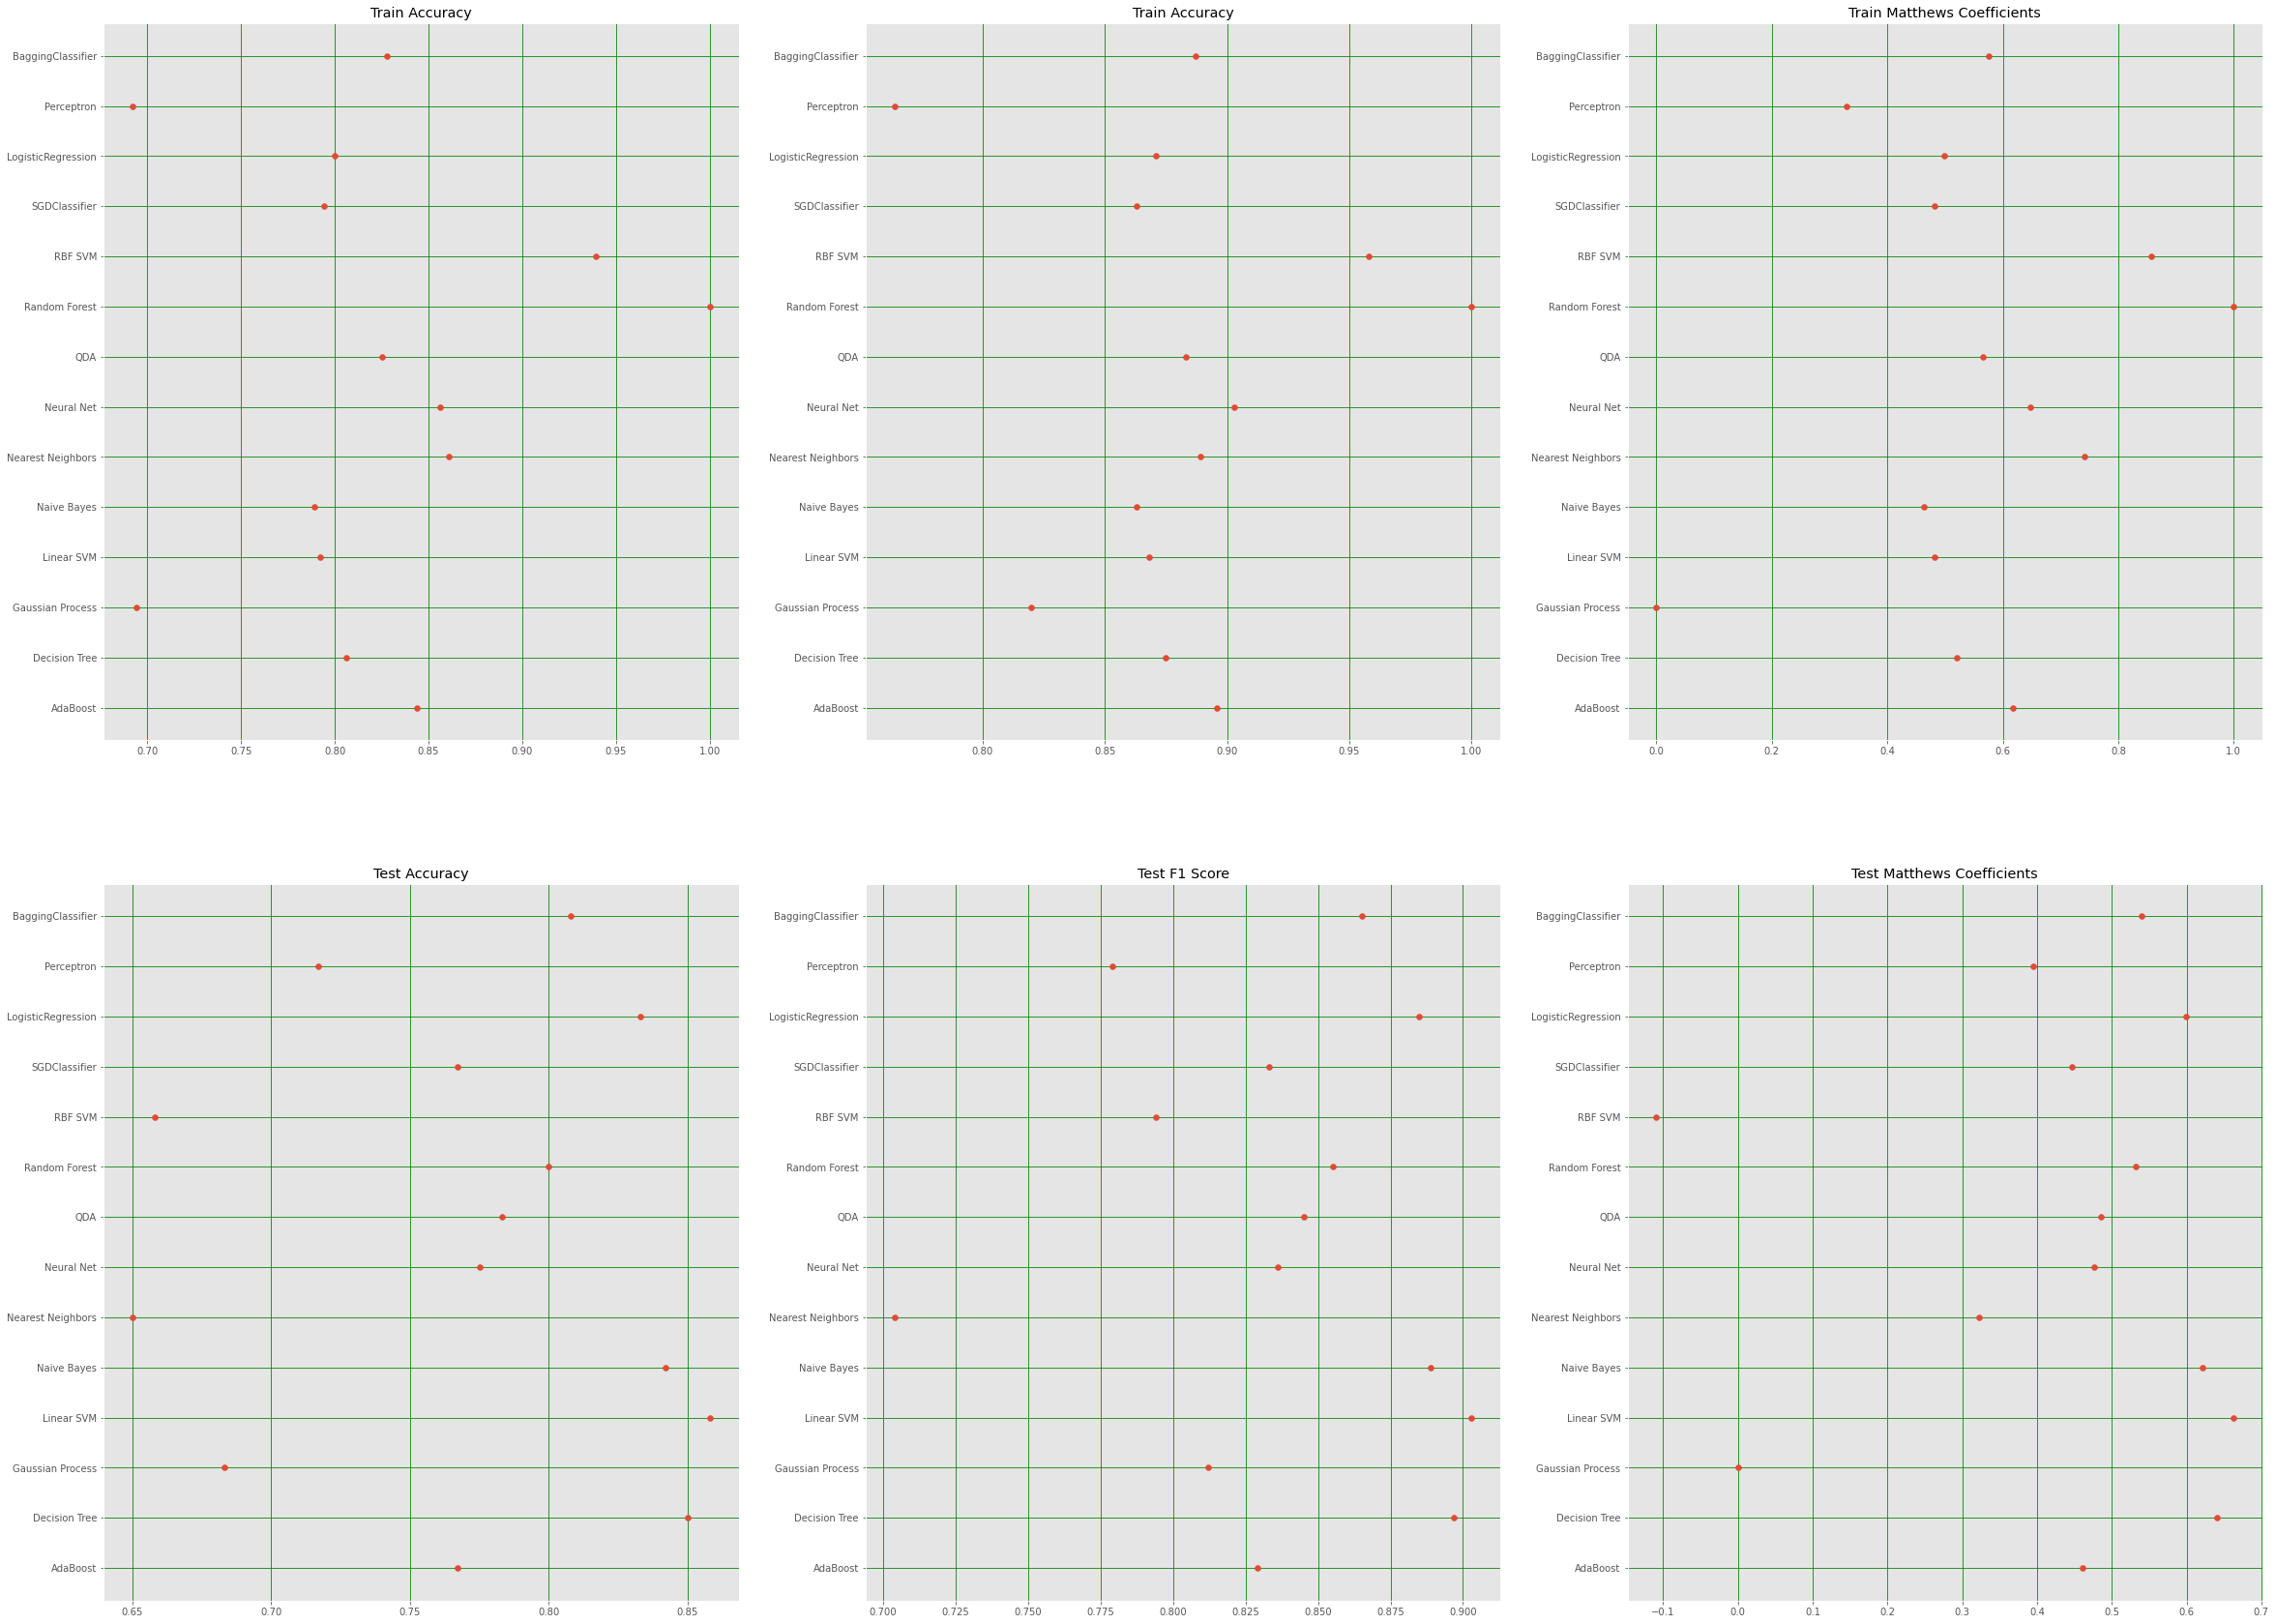

In [27]:
plt.rcParams['figure.figsize'] = (40.0, 30.0)
figs, ax = plt.subplots(2,3)

ax[0,0].scatter(x =  train_accuracy_score,y = clf_names)
ax[0,0].set_title("Train Accuracy")
ax[0,0].grid(True, color = 'g')

ax[0,1].scatter(x =  train_f1score,y = clf_names)
ax[0,1].set_title("Train Accuracy")
ax[0,1].grid(True, color = 'g')

ax[0,2].scatter(x =  train_matthews,y = clf_names)
ax[0,2].set_title("Train Matthews Coefficients")
ax[0,2].grid(True, color = 'g')


ax[1,0].scatter(test_accuracy_score,clf_names)
ax[1,0].set_title("Test Accuracy")
ax[1,0].grid(True, color = 'g')


ax[1,1].scatter(test_f1score,clf_names)
ax[1,1].set_title("Test F1 Score")
ax[1,1].grid(True, color = 'g')

ax[1,2].scatter(test_matthews,clf_names)
ax[1,2].set_title("Test Matthews Coefficients")
ax[1,2].grid(True, color = 'g')

plt.show()

From the graphs above, one would notice overfitting on the Random Forest classifier. The Linear SVM showed the best test accuracy. This is followed by the Stochastic Gradient Descent (SGD) Classifier, Decision Tree, Naive Bayes  and Logistic Regression. 

# Polynomial Features

The PolynomialFeatures will be used for feature creation to explore the nonlinear pattern of the numerical data.

0 : AdaBoost training done! 
 
              precision    recall  f1-score   support

           0       0.66      0.61      0.63        38
           1       0.82      0.85      0.84        82

    accuracy                           0.78       120
   macro avg       0.74      0.73      0.73       120
weighted avg       0.77      0.78      0.77       120

[[23 15]
 [12 70]]


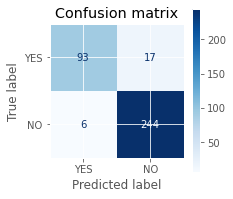

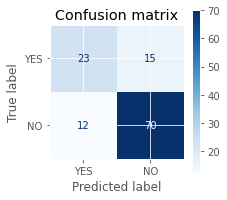

The Training Accuracy Score:  0.9361111111111111
The Training F1 Score:  0.9549902152641879
The Training Matthews coefficient:  0.8474459978625458
AdaBoost training score done!
The Accuracy Score:  0.775
Test F1 Score:  0.8383233532934131
The Testing Matthews coefficient:  0.4696710893132069
AdaBoost testing score done!
-------------------------------------------------------
  
1 : Decision Tree training done! 
 
              precision    recall  f1-score   support

           0       0.85      0.61      0.71        38
           1       0.84      0.95      0.89        82

    accuracy                           0.84       120
   macro avg       0.85      0.78      0.80       120
weighted avg       0.84      0.84      0.83       120

[[23 15]
 [ 4 78]]


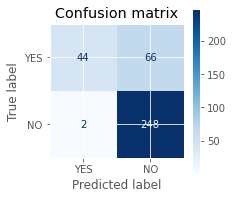

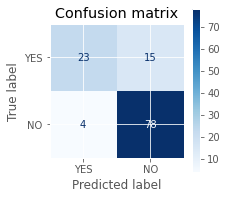

The Training Accuracy Score:  0.8111111111111111
The Training F1 Score:  0.8794326241134751
The Training Matthews coefficient:  0.5408896535158827
Decision Tree training score done!
The Accuracy Score:  0.8416666666666667
Test F1 Score:  0.8914285714285715
The Testing Matthews coefficient:  0.6199076735048351
Decision Tree testing score done!
-------------------------------------------------------
  
2 : Gaussian Process training done! 
 
              precision    recall  f1-score   support

           0       0.77      0.61      0.68        38
           1       0.83      0.91      0.87        82

    accuracy                           0.82       120
   macro avg       0.80      0.76      0.77       120
weighted avg       0.81      0.82      0.81       120

[[23 15]
 [ 7 75]]


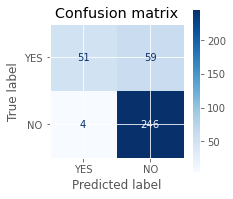

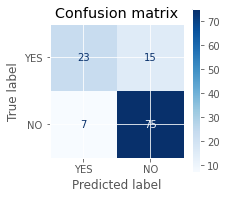

The Training Accuracy Score:  0.825
The Training F1 Score:  0.8864864864864864
The Training Matthews coefficient:  0.5731396334450725
Gaussian Process training score done!
The Accuracy Score:  0.8166666666666667
Test F1 Score:  0.872093023255814
The Testing Matthews coefficient:  0.5585144425542818
Gaussian Process testing score done!
-------------------------------------------------------
  
3 : Linear SVM training done! 
 
              precision    recall  f1-score   support

           0       0.55      0.63      0.59        38
           1       0.82      0.76      0.78        82

    accuracy                           0.72       120
   macro avg       0.68      0.69      0.69       120
weighted avg       0.73      0.72      0.72       120

[[24 14]
 [20 62]]


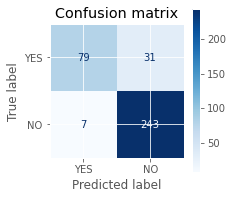

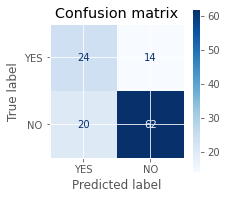

The Training Accuracy Score:  0.8944444444444445
The Training F1 Score:  0.9274809160305344
The Training Matthews coefficient:  0.7455990639941462
Linear SVM training score done!
The Accuracy Score:  0.7166666666666667
Test F1 Score:  0.7848101265822786
The Testing Matthews coefficient:  0.3742269632186825
Linear SVM testing score done!
-------------------------------------------------------
  
4 : Naive Bayes training done! 
 
              precision    recall  f1-score   support

           0       0.69      0.63      0.66        38
           1       0.84      0.87      0.85        82

    accuracy                           0.79       120
   macro avg       0.76      0.75      0.75       120
weighted avg       0.79      0.79      0.79       120

[[24 14]
 [11 71]]


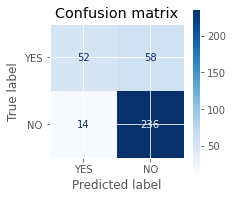

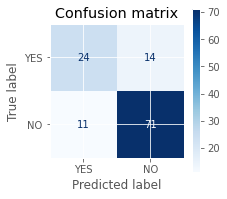

The Training Accuracy Score:  0.8
The Training F1 Score:  0.8676470588235294
The Training Matthews coefficient:  0.4961038961038961
Naive Bayes training score done!
The Accuracy Score:  0.7916666666666666
Test F1 Score:  0.8502994011976048
The Testing Matthews coefficient:  0.5090840478569725
Naive Bayes testing score done!
-------------------------------------------------------
  
5 : Nearest Neighbors training done! 
 
              precision    recall  f1-score   support

           0       0.48      0.79      0.60        38
           1       0.86      0.61      0.71        82

    accuracy                           0.67       120
   macro avg       0.67      0.70      0.66       120
weighted avg       0.74      0.67      0.68       120

[[30  8]
 [32 50]]


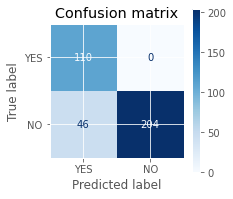

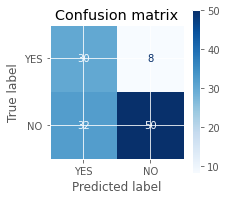

The Training Accuracy Score:  0.8722222222222222
The Training F1 Score:  0.8986784140969163
The Training Matthews coefficient:  0.7585411098843723
Nearest Neighbors training score done!
The Accuracy Score:  0.6666666666666666
Test F1 Score:  0.7142857142857144
The Testing Matthews coefficient:  0.37163089761362567
Nearest Neighbors testing score done!
-------------------------------------------------------
  


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


6 : Neural Net training done! 
 
              precision    recall  f1-score   support

           0       0.50      0.61      0.55        38
           1       0.80      0.72      0.76        82

    accuracy                           0.68       120
   macro avg       0.65      0.66      0.65       120
weighted avg       0.70      0.68      0.69       120

[[23 15]
 [23 59]]


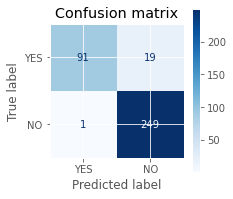

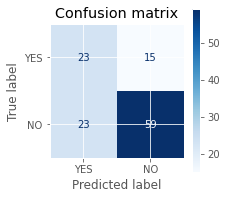

The Training Accuracy Score:  0.9444444444444444
The Training F1 Score:  0.9613899613899614
The Training Matthews coefficient:  0.8694583144717717
Neural Net training score done!
The Accuracy Score:  0.6833333333333333
Test F1 Score:  0.7564102564102565
The Testing Matthews coefficient:  0.31073273834701903
Neural Net testing score done!
-------------------------------------------------------
  
7 : QDA training done! 
 
              precision    recall  f1-score   support

           0       0.86      0.63      0.73        38
           1       0.85      0.95      0.90        82

    accuracy                           0.85       120
   macro avg       0.85      0.79      0.81       120
weighted avg       0.85      0.85      0.84       120

[[24 14]
 [ 4 78]]


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


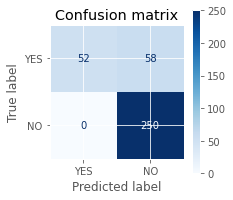

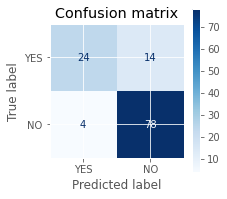

The Training Accuracy Score:  0.8388888888888889
The Training F1 Score:  0.8960573476702508
The Training Matthews coefficient:  0.6194410398811335
QDA training score done!
The Accuracy Score:  0.85
Test F1 Score:  0.8965517241379309
The Testing Matthews coefficient:  0.6409795742933276
QDA testing score done!
-------------------------------------------------------
  
8 : Random Forest training done! 
 
              precision    recall  f1-score   support

           0       0.68      0.66      0.67        38
           1       0.84      0.85      0.85        82

    accuracy                           0.79       120
   macro avg       0.76      0.76      0.76       120
weighted avg       0.79      0.79      0.79       120

[[25 13]
 [12 70]]


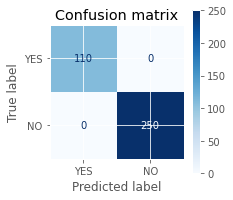

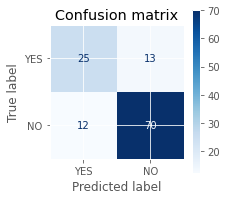

The Training Accuracy Score:  1.0
The Training F1 Score:  1.0
The Training Matthews coefficient:  1.0
Random Forest training score done!
The Accuracy Score:  0.7916666666666666
Test F1 Score:  0.8484848484848484
The Testing Matthews coefficient:  0.5152875913556197
Random Forest testing score done!
-------------------------------------------------------
  
9 : RBF SVM training done! 
 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.68      0.98      0.80        82

    accuracy                           0.67       120
   macro avg       0.34      0.49      0.40       120
weighted avg       0.46      0.67      0.55       120

[[ 0 38]
 [ 2 80]]


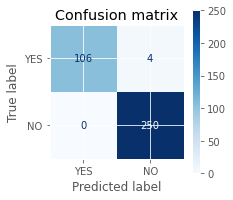

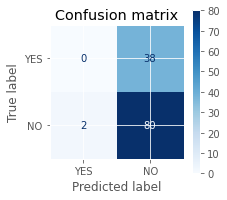

The Training Accuracy Score:  0.9888888888888889
The Training F1 Score:  0.9920634920634921
The Training Matthews coefficient:  0.9738896178885298
RBF SVM training score done!
The Accuracy Score:  0.6666666666666666
Test F1 Score:  0.7999999999999999
The Testing Matthews coefficient:  -0.08862553426927401
RBF SVM testing score done!
-------------------------------------------------------
  
10 : SGDClassifier training done! 
 
              precision    recall  f1-score   support

           0       0.40      0.66      0.50        38
           1       0.78      0.55      0.64        82

    accuracy                           0.58       120
   macro avg       0.59      0.60      0.57       120
weighted avg       0.66      0.58      0.60       120

[[25 13]
 [37 45]]


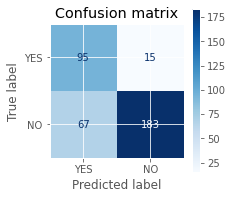

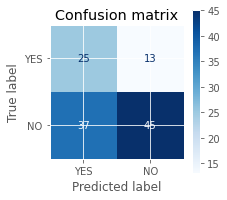

The Training Accuracy Score:  0.7722222222222223
The Training F1 Score:  0.8169642857142857
The Training Matthews coefficient:  0.5515151515151515
SGDClassifier training score done!
The Accuracy Score:  0.5833333333333334
Test F1 Score:  0.6428571428571428
The Testing Matthews coefficient:  0.1923876994076969
SGDClassifier testing score done!
-------------------------------------------------------
  


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


11 : LogisticRegression training done! 
 
              precision    recall  f1-score   support

           0       0.59      0.63      0.61        38
           1       0.82      0.79      0.81        82

    accuracy                           0.74       120
   macro avg       0.70      0.71      0.71       120
weighted avg       0.75      0.74      0.74       120

[[24 14]
 [17 65]]


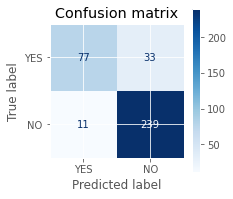

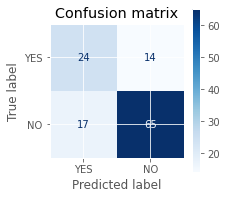

The Training Accuracy Score:  0.8777777777777778
The Training F1 Score:  0.9157088122605365
The Training Matthews coefficient:  0.7031441990842862
LogisticRegression training score done!
The Accuracy Score:  0.7416666666666667
Test F1 Score:  0.8074534161490684
The Testing Matthews coefficient:  0.41612830421939034
LogisticRegression testing score done!
-------------------------------------------------------
  
12 : Perceptron training done! 
 
              precision    recall  f1-score   support

           0       0.47      0.61      0.53        38
           1       0.79      0.68      0.73        82

    accuracy                           0.66       120
   macro avg       0.63      0.64      0.63       120
weighted avg       0.69      0.66      0.67       120

[[23 15]
 [26 56]]


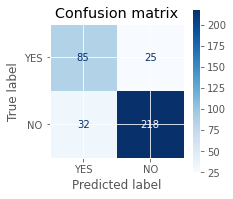

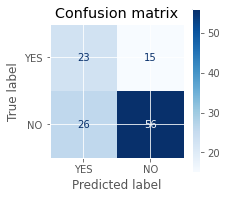

The Training Accuracy Score:  0.8416666666666667
The Training F1 Score:  0.8843813387423936
The Training Matthews coefficient:  0.634083308455318
Perceptron training score done!
The Accuracy Score:  0.6583333333333333
Test F1 Score:  0.7320261437908497
The Testing Matthews coefficient:  0.27274098071571634
Perceptron testing score done!
-------------------------------------------------------
  
13 : BaggingClassifier training done! 
 
              precision    recall  f1-score   support

           0       0.85      0.74      0.79        38
           1       0.89      0.94      0.91        82

    accuracy                           0.88       120
   macro avg       0.87      0.84      0.85       120
weighted avg       0.87      0.88      0.87       120

[[28 10]
 [ 5 77]]


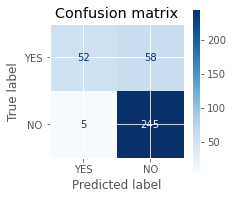

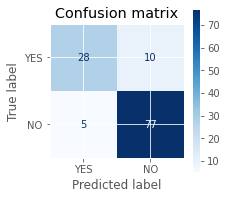

The Training Accuracy Score:  0.825
The Training F1 Score:  0.8860759493670886
The Training Matthews coefficient:  0.5712737417389137
BaggingClassifier training score done!
The Accuracy Score:  0.875
Test F1 Score:  0.911242603550296
The Testing Matthews coefficient:  0.7041141079079599
BaggingClassifier testing score done!
-------------------------------------------------------
  
Names:  ['AdaBoost', 'Decision Tree', 'Gaussian Process', 'Linear SVM', 'Naive Bayes', 'Nearest Neighbors', 'Neural Net', 'QDA', 'Random Forest', 'RBF SVM', 'SGDClassifier', 'LogisticRegression', 'Perceptron', 'BaggingClassifier']
Train Accuracy Scores:  [0.936, 0.811, 0.825, 0.894, 0.8, 0.872, 0.944, 0.839, 1.0, 0.989, 0.772, 0.878, 0.842, 0.825]
Test Accuracy Scores:  [0.775, 0.842, 0.817, 0.717, 0.792, 0.667, 0.683, 0.85, 0.792, 0.667, 0.583, 0.742, 0.658, 0.875]
Train F1 Scores:  [0.955, 0.879, 0.886, 0.927, 0.868, 0.899, 0.961, 0.896, 1.0, 0.992, 0.817, 0.916, 0.884, 0.886]
Test F1 Scores:  [0.838, 0.89

In [28]:
plt.rcParams['figure.figsize'] = (3.0, 3.0)
#use each Classifier to take its training results.
clf_names = []
train_accuracy_score = []
test_accuracy_score = []
predict_sums = []
test_f1score = []
train_f1score = []
test_matthews = []
train_matthews = []
i = 0

for n,clf in classifiers_:
    clf_names.append(n)
    
    # Model declaration with pipeline
    clf = Pipeline([('POLY', poly),('CLF',clf)])
    
    # Model training
    clf.fit(X_train, y_train)
    print(i, ":",  n+" training done! \n ")
    
    # The prediction for both training and testing 
    clf.predict(X_test)
    clf.predict(X_train)
    predict_sums.append(clf.predict(X_test).sum()) 
        #you can print the classification report and confusion matrix if you like
    print(classification_report(y_test, clf.predict(X_test)))
    print(confusion_matrix(y_test, clf.predict(X_test)))
    
    #you can also plot the confussion matrix if you like
    disp1 = plot_confusion_matrix(clf, X_train, y_train,
                              display_labels=['YES','NO'],
                              cmap=plt.cm.Blues,
                              normalize=None)
    disp1.ax_.set_title('Confusion matrix')
    plt.show()
    
    disp = plot_confusion_matrix(clf, X_test, y_test,
                              display_labels=['YES','NO'],
                              cmap=plt.cm.Blues,
                              normalize=None)
    disp.ax_.set_title('Confusion matrix')
    plt.show()
    
    # Measure training accuracy
    train_accuracy_score.append(round(accuracy_score(y_train, clf.predict(X_train)), 3))
    train_matthews.append(round(matthews_corrcoef(y_train, clf.predict(X_train)),3))
    train_f1score.append(round(f1_score(y_train, clf.predict(X_train)),3))
    print("The Training Accuracy Score: ", accuracy_score(y_train, clf.predict(X_train)) )
    print("The Training F1 Score: ", f1_score(y_train, clf.predict(X_train)) )
    print("The Training Matthews coefficient: ", matthews_corrcoef(y_train, clf.predict(X_train)))
    print(n+" training score done!")
    
    # Measure test accuracy 
    test_accuracy_score.append(round(accuracy_score(y_test, clf.predict(X_test)), 3))
    test_f1score.append(round(f1_score(y_test, clf.predict(X_test)),3))
    test_matthews.append(round(matthews_corrcoef(y_test, clf.predict(X_test)),3))
    print("The Accuracy Score: ", accuracy_score(y_test, clf.predict(X_test)))
    print("Test F1 Score: ",f1_score(y_test,clf.predict(X_test)))
    print("The Testing Matthews coefficient: ", matthews_corrcoef(y_test, clf.predict(X_test)))
    print(n+" testing score done!")
    print("-------------------------------------------------------")
    print("  ")
    i = i+1
print("Names: ", clf_names)
print("Train Accuracy Scores: ", train_accuracy_score)
print("Test Accuracy Scores: ", test_accuracy_score)
print("Train F1 Scores: ", train_f1score)
print("Test F1 Scores: ", test_f1score)
print("Train Matthews Coefficients", train_matthews)
print("Test Matthews Coefficients", test_matthews)

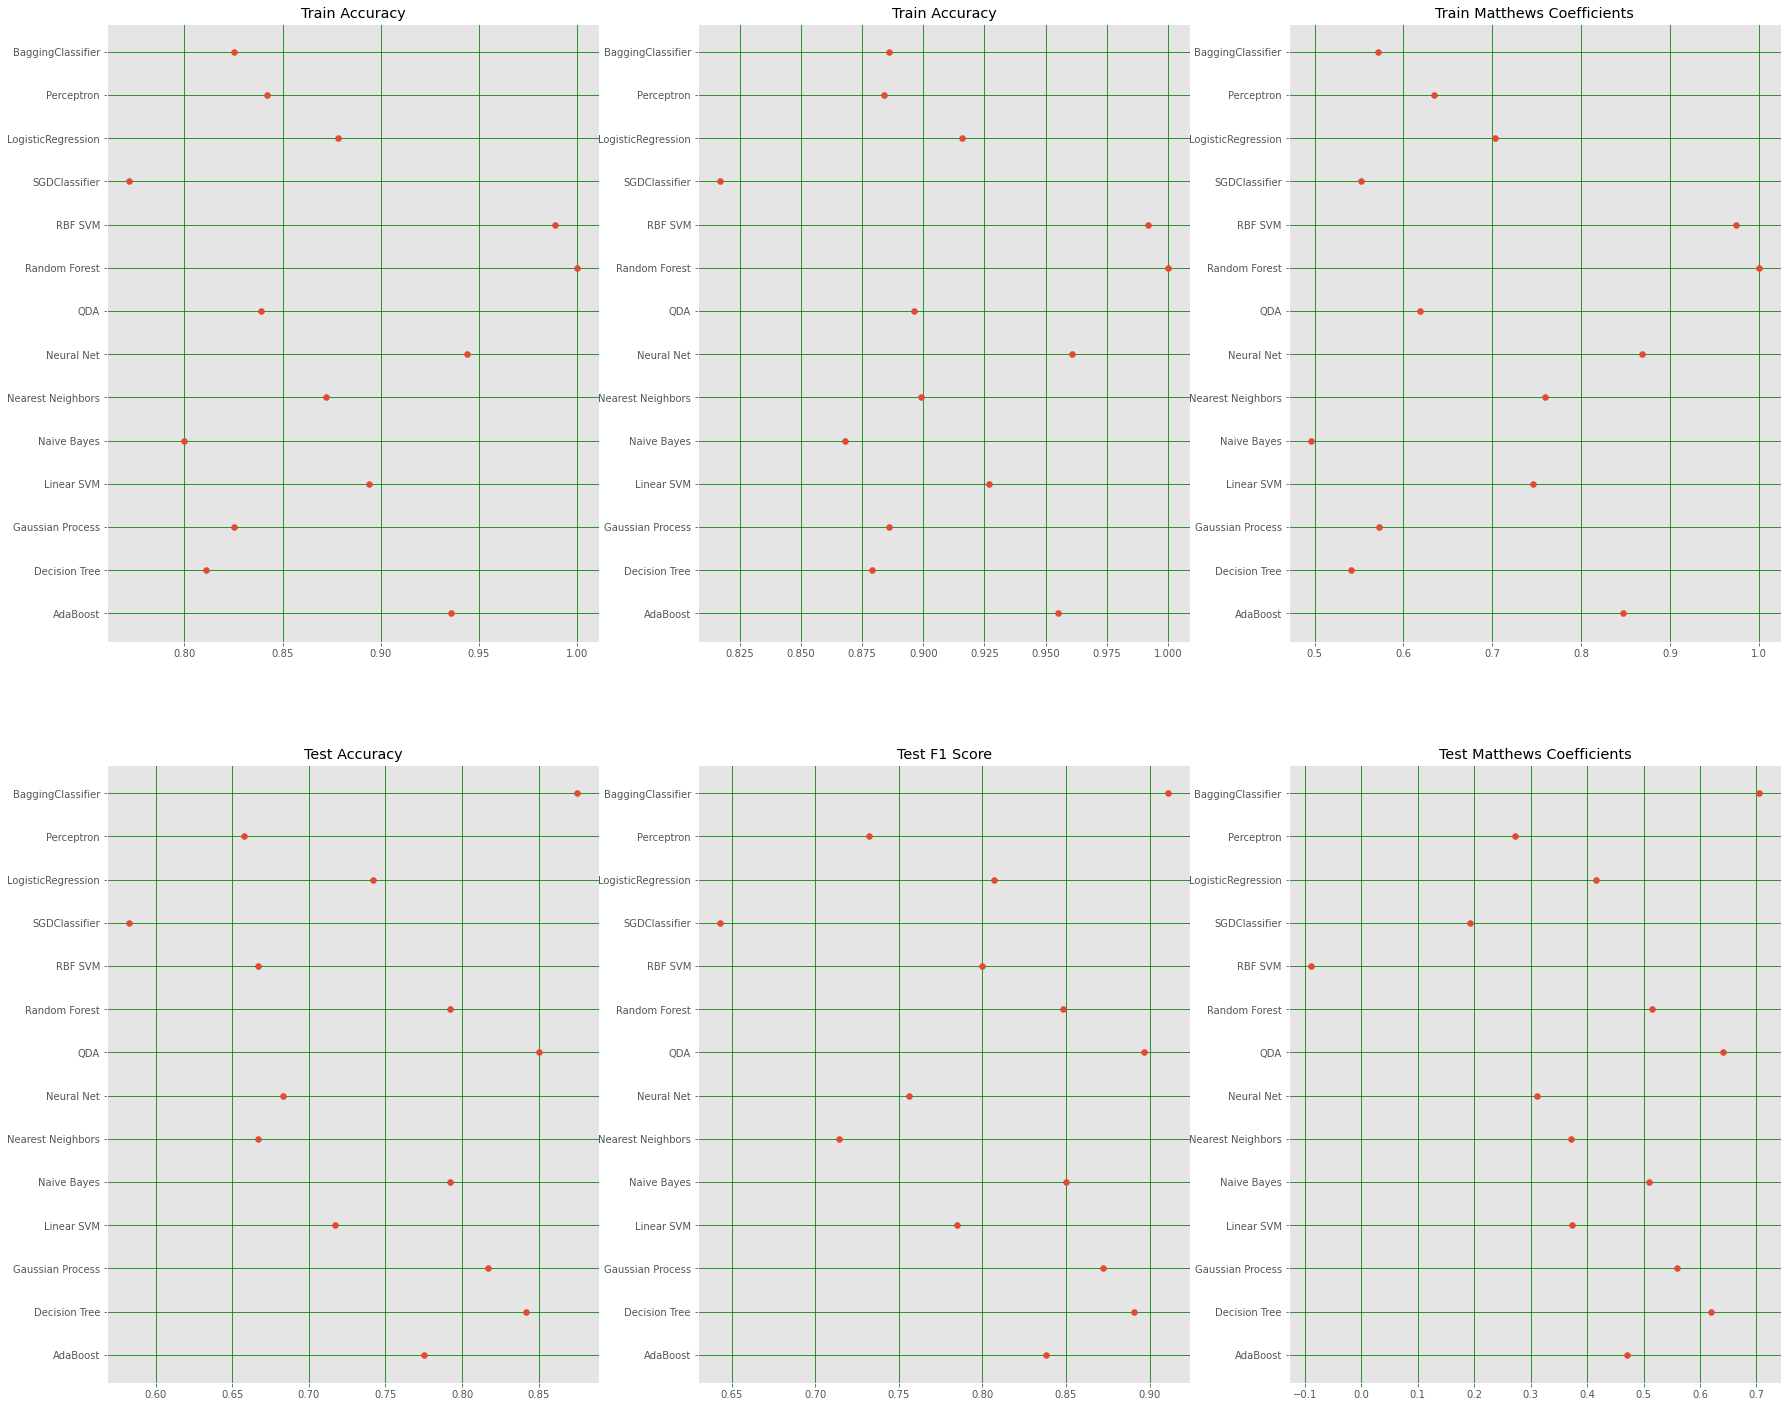

In [29]:
plt.rcParams['figure.figsize'] = (30.0, 25.0)
figs, ax = plt.subplots(2,3)

ax[0,0].scatter(x =  train_accuracy_score,y = clf_names)
ax[0,0].set_title("Train Accuracy")
ax[0,0].grid(True, color = 'g')

ax[0,1].scatter(x =  train_f1score,y = clf_names)
ax[0,1].set_title("Train Accuracy")
ax[0,1].grid(True, color = 'g')

ax[0,2].scatter(x =  train_matthews,y = clf_names)
ax[0,2].set_title("Train Matthews Coefficients")
ax[0,2].grid(True, color = 'g')


ax[1,0].scatter(test_accuracy_score,clf_names)
ax[1,0].set_title("Test Accuracy")
ax[1,0].grid(True, color = 'g')


ax[1,1].scatter(test_f1score,clf_names)
ax[1,1].set_title("Test F1 Score")
ax[1,1].grid(True, color = 'g')

ax[1,2].scatter(test_matthews,clf_names)
ax[1,2].set_title("Test Matthews Coefficients")
ax[1,2].grid(True, color = 'g')

plt.show()

From the graphs above, most of the models performed better with polynomial input features. In fact the Bagging classifier (with accuracy score = 0.911) did better than the Linear SVM (with accuracy score = 0.903) when the linear input features are used. This is followed by the QDA, Decision Tree, Gaussian Process and Nearest Neighbours. So, from here on, I will stick with using the polynomial input features. 

One can combine the few best multiple models into a single model to obtain a hopefully better accuracy. The models are combined using the Stacking Classifier. That is, combining the prediction probabilities from multiple machine learning models on the same dataset. 


# Combining the models

In [30]:
#THE STACKING CLASSIFIER
#Let's use the combination of the prediction probability of the best five classifiers

bestclassifiers = [("BaggingClassifier", BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=0)), 
    ("QDA", QuadraticDiscriminantAnalysis()),
    ("Decision Tree", DecisionTreeClassifier(max_depth=10)),
    ("Gaussian Process", GaussianProcessClassifier(1.0 * RBF(1.0))),
    ("Nearest Neighbors",KNeighborsClassifier(2))
                  ] 

#Build the stack model
stack_model = StackingClassifier(estimators = bestclassifiers, final_estimator = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=0) )
#I used the best estimator as my final estimator to optimise the result.

# Model declaration with pipeline
stack_model = Pipeline([('POLY', poly),('CLF',stack_model)])

#train the stack model
stack_model.fit(X_train, y_train)



# The prediction for both training and testing 
stack_model.predict(X_test)
stack_model.predict(X_train)

# Measure training accuracy

print("The Training Accuracy Score: ", accuracy_score(y_train, stack_model.predict(X_train)) )
print("The Training F1 Score: ", f1_score(y_train, stack_model.predict(X_train)) )
print("The Training Matthews coefficient: ", matthews_corrcoef(y_train, stack_model.predict(X_train)))

    
# Measure test accuracy 

print("Test Accuracy Score: ", accuracy_score(y_test, stack_model.predict(X_test)))
print("Test F1 Score: ",f1_score(y_test,stack_model.predict(X_test)))
print("The Testing Matthews coefficient: ", matthews_corrcoef(y_test, stack_model.predict(X_test)))

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  war

The Training Accuracy Score:  0.8361111111111111
The Training F1 Score:  0.8944543828264759
The Training Matthews coefficient:  0.6124625103356428
Test Accuracy Score:  0.85
Test F1 Score:  0.8965517241379309
The Testing Matthews coefficient:  0.6409795742933276


Although the stack_model (with accuracy score = 0.858, f1 score = 0.903 and Matthews coefficient = 0.663) performed way better than most of the models used, it is still not as accurate as the Bagging Classifier (with accuracy Score = 0.875 , f1 score = 0.911 and Matthews coefficient = 0.704). So, I would rather stick with the single model when deploying.  

We can also get the most importance features for determing the result of the loan eligibility. This can basically be included when deploying the models but it is done here for clarity purpose. This is not straight-forward since we are using the pipepline. 

# Most important feature

<ipython-input-38-8ea3b19b05b6>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["feature"][i] = column_head[i]


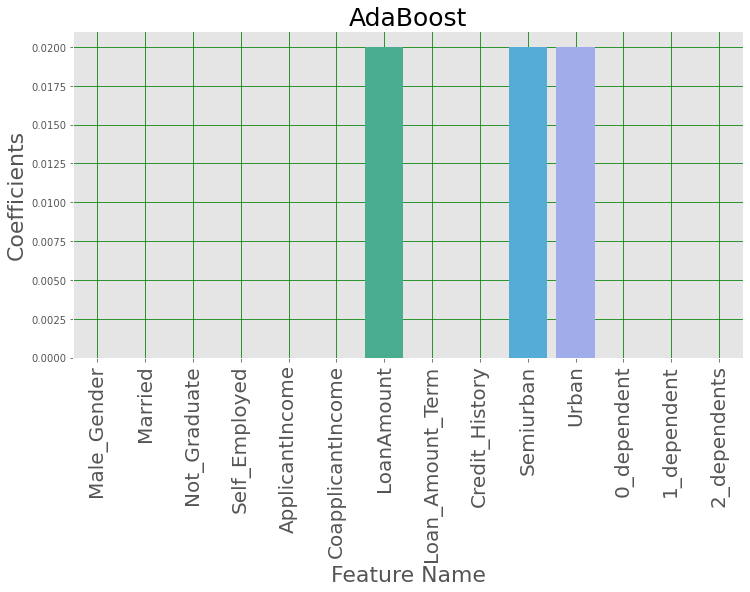

<ipython-input-38-8ea3b19b05b6>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["feature"][i] = column_head[i]


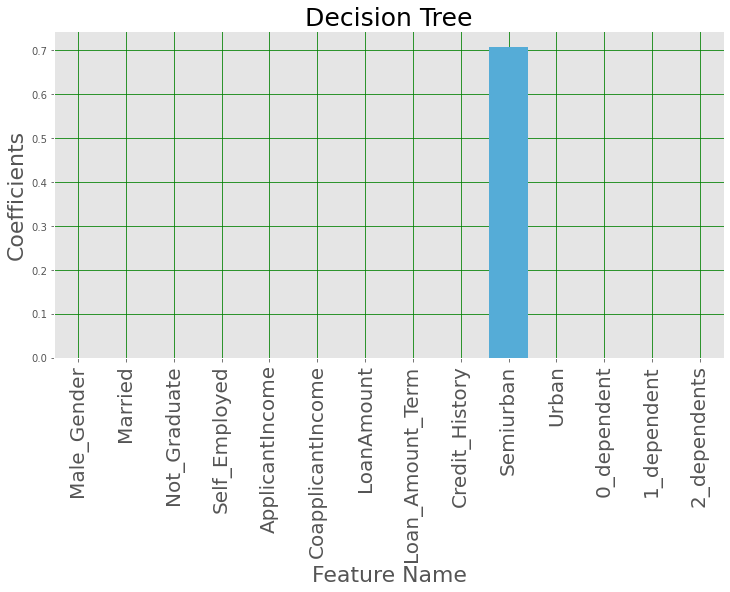

<ipython-input-38-8ea3b19b05b6>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["feature"][i] = column_head[i]


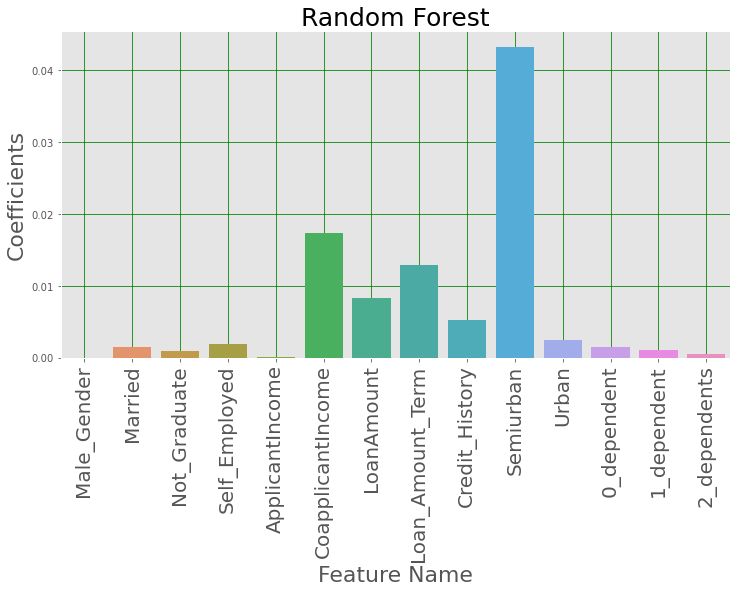

In [38]:
#to obtain the feature importance, 

theclassifiers = classifiers_ = [
    ("AdaBoost", AdaBoostClassifier()),
    ("Decision Tree", DecisionTreeClassifier(max_depth=3)),
    ("Random Forest",RandomForestClassifier(n_jobs=2, random_state=1))
    ] 
#NB: these classifiers are considered because they are only once amongst the classfiers considered that run with the 
# "feature_importances_" code line

for n,clif in theclassifiers:
    clif = Pipeline([('POLY', poly),('CLF',clif)])
    clif.fit(X_train, y_train)
    feature_names = clif.named_steps["POLY"].get_feature_names()
#put the name of the column heads in a list
    column_head = loan_train.drop(["Loan_Status"], axis = 1).columns

#obtain the coefficients of the features
    coefs = clif.named_steps["CLF"].feature_importances_.flatten()

# Zip coefficients and names together and make a DataFrame
    zipped = zip(feature_names, coefs)
    df = pd.DataFrame(zipped, columns=["feature", "value"])

#since we need the names of the column heads as the tick labels
    for i in range(len(column_head)):
        df["feature"][i] = column_head[i]
    
#Make a bar chart of the coefficients
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    sns.barplot(x=df["feature"][0:len(column_head)],
                y=df["value"][0:len(column_head)])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
    ax.set_title(n, fontsize=25)
    ax.set_ylabel("Coefficients", fontsize=22)
    ax.set_xlabel("Feature Name", fontsize=22)
    ax.grid(True, color = "g")
    plt.show()

The scores suggest that the important features, which are features with non-zero coefficients, are dependent on the model deployed. However, the three plots above show that the property being in the Semi-Urban area appears to be generally "the most" important feature. Basically, all other features with a zero coefficient are essentially removed them from the model.

# DEPLOYING THE MODEL

Since we have found out that the best model is the BaggingClassifier. This model is typically deployed by exporting the model and binding it with an application API. Here, I will just try to take the details of the from the customers to prediction the customers eligibility for the loan. 

In [32]:
#GENDER
gender = input("State your gender [Male(m) or Female (f)]:\n ").lower()
if gender in ["male", "m"]:
    Male_Gender = 1
elif gender in ["female", "f"]:
    Male_Gender = 0
else:
    print("ERROR: Invalid Input!!!")
    
#MARITAL STATUS
married = input("Are you married? (y/n) \n ").lower()
if married in ["yes", "y"]:
    Married = 1
elif married in ["no", "n"]:
    Married = 0
else:
    print("ERROR: Invalid Input!!!")

#GRADUATE
graduate = input("Are you a graduate? (y/n) \n ").lower()
if graduate in ["yes", "y"]:
    Not_Graduate = 0
elif graduate in ["no", "n"]:
    Not_Graduate = 1
else:
    print("ERROR: Invalid Input!!!")
    
#SELF-EMPLOYED
Self_Employed = input("Are you self-employed? (y/n) \n ").lower()
if Self_Employed in ["yes", "y"]:
    Self_Employed = 1
elif Self_Employed in ["no", "n"]:
    Self_Employed = 0
else:
    print("ERROR: Invalid Input!!!")
    
#Applicant's Income
ApplicantIncome = input("What the applicant's income? (Enter figures only) \n ")
ApplicantIncome = float(ApplicantIncome)

#Co-Applicant's Income
CoapplicantIncome = input("What the co-applicant's income? (Enter figures only) \n ")
CoapplicantIncome = float(CoapplicantIncome)

#LOAN AMOUNT
LoanAmount  = input("How much do you want to loan? (Enter figures only) \n")
LoanAmount = float(LoanAmount)

#LOAN AMOUNT TERM
Loan_Amount_Term = input("How long (in months) is the loan for? (Enter figures only) \n")
Loan_Amount_Term = float(Loan_Amount_Term)

#CREDIT HISTORY
Credit_History = input("Does your credit history completely meet the requirements? (y/n) \n")
if Credit_History in ["yes", "y"]:
    Credit_History = 1
elif Credit_History in ["no", "n"]:
    Credit_History = 0
else:
    print("ERROR: Invalid Input!!!")
    
#Dependents
dependents_0 = 0
dependents_1 = 0
dependents_2 = 0

Dependents = input("How many dependents do you have? (Enter figures only) \n")
Dependents = abs(int(Dependents))
if Dependents==0:
    dependents_0 = 1
elif Dependents==1:
    dependents_1 = 1
elif Dependents==2:
    dependents_2 = 1
    
#PROPERTY AREA
urban = 0
semi_urban = 0
Property_Area = input("Where is the property situated? [Urban (u) or Semi-urban (s) or Rural (r)] \n").lower()
if Property_Area in ["urban", "u"]:
    urban=1
elif Property_Area in ["semi-urban", "s"]:
    semi_urban = 1

    
#The prediction based on the details
print("\n\n THE LOAN ELGIBILTY: ")
Xnew = [[Male_Gender, Married, Not_Graduate, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History,semi_urban, urban, dependents_0, dependents_1, dependents_2]]
Xnew = sc.transform(Xnew)

AdaBoostCF =  AdaBoostClassifier()
AdaBoostCF = Pipeline([('POLY', poly),('CLF',AdaBoostCF)])
AdaBoostCF.fit(X_train, y_train)

ynew = AdaBoostCF.predict(Xnew)
if ynew[0]==0: 
    print("Sorry, you are not eligible for a loan.")
elif ynew[0]==1:
    print("Congratulations, you are eligible for a loan")

    

State your gender [Male(m) or Female (f)]:
 m
Are you married? (y/n) 
 y
Are you a graduate? (y/n) 
 y
Are you self-employed? (y/n) 
 n
What the applicant's income? (Enter figures only) 
 500
What the co-applicant's income? (Enter figures only) 
 500
How much do you want to loan? (Enter figures only) 
300
How long (in months) is the loan for? (Enter figures only) 
36
Does your credit history completely meet the requirements? (y/n) 
y
How many dependents do you have? (Enter figures only) 
0
Where is the property situated? [Urban (u) or Semi-urban (s) or Rural (r)] 
u


 THE LOAN ELGIBILTY: 
Sorry, you are not eligible for a loan.
